# CV Lab 1

Name: Mihir chaubey

Batch: A1

PRN: 1032211021


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

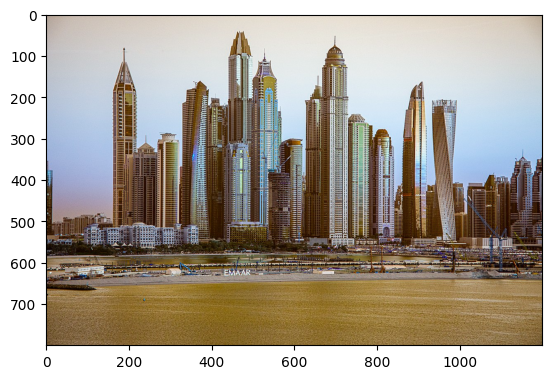

In [ ]:
img = cv2.imread('gray.jpg')
plt.imshow(img)

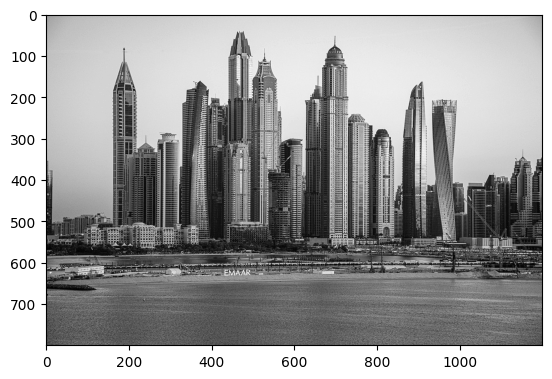

In [ ]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

# **Geometric Transformations**

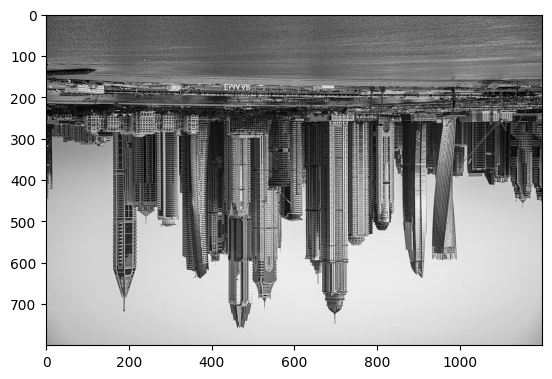

In [ ]:
# REFLECTION
rows, cols = img1.shape
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv2.warpPerspective(img1, M, (int(cols), int(rows)))

plt.imshow(reflected_img, cmap='gray')

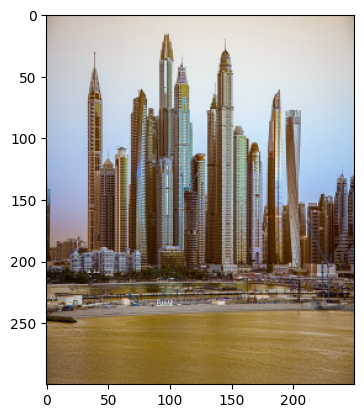

In [ ]:
# RESIZING
img_shrinked = cv2.resize(img, (250, 300),interpolation = cv2.INTER_AREA)
plt.imshow(img_shrinked)

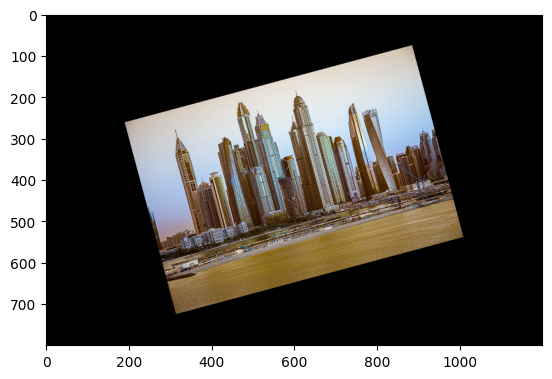

In [ ]:
# ROTATION
img_rotated = cv2.warpAffine(img, cv2.getRotationMatrix2D((cols/2, rows/2), 15, 0.6),(cols, rows))
plt.imshow(img_rotated)

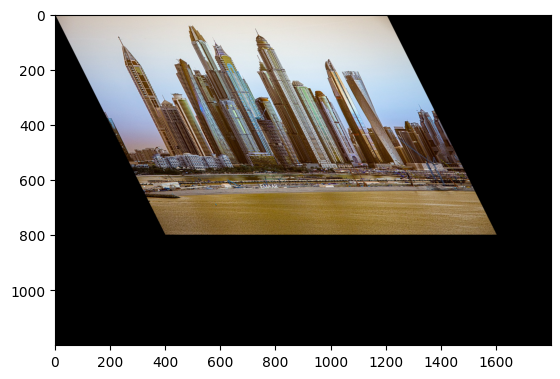

In [ ]:
# SHEARING
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
plt.imshow(sheared_img)

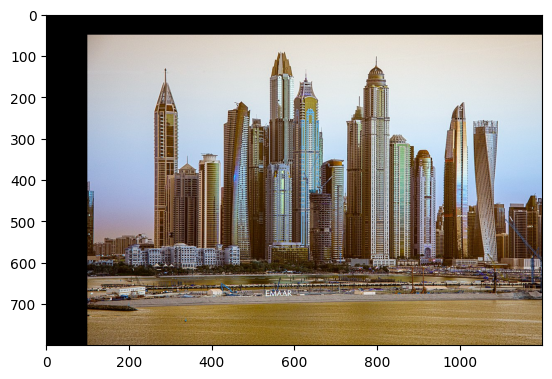

In [ ]:
# TRANSLATION
M = np.float32([[1, 0, 100], [0, 1, 50]])
shifted_img = cv2.warpAffine(img, M, (cols,rows))
plt.imshow(shifted_img)

# **Negative of Image**

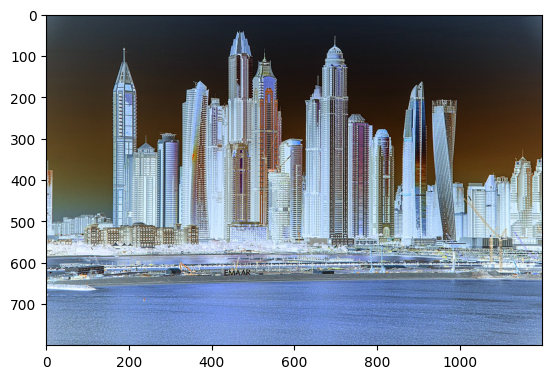

In [ ]:
colored_negative = abs(255-img)
plt.imshow(colored_negative)

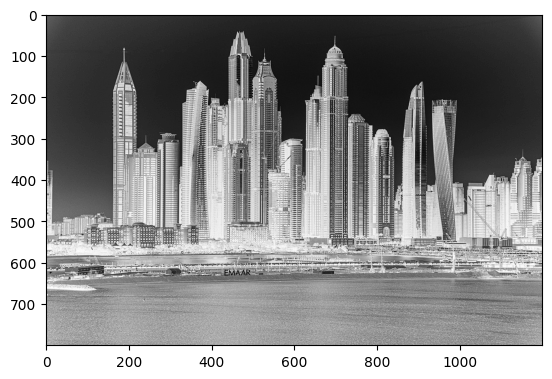

In [ ]:
gray_negative = abs(255-img1)
plt.imshow(gray_negative, cmap='gray')

# **Addition and Subtraction**

In [ ]:
image1 = cv2.imread('zigzag.jpg')
image2 = cv2.imread('apple.png')
image1 = cv2.resize(image1, (image2.shape[1],image2.shape[0]))

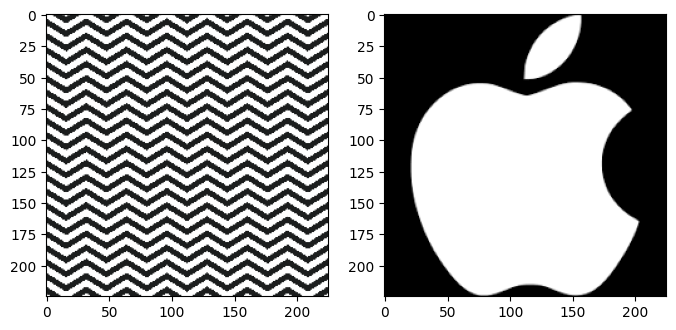

In [ ]:
f, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(image1)
ax[1].imshow(image2)

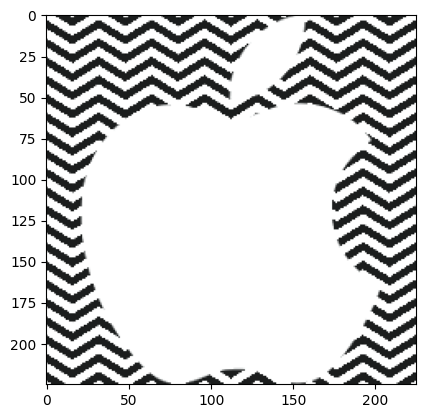

In [ ]:
# ADDITION
merged_img = cv2.add(image1,image2)
plt.imshow(merged_img)

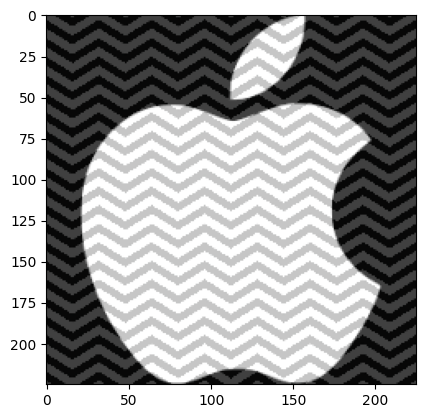

In [ ]:
# WEIGHTED ADDITION
img3 = cv2.addWeighted(image1,0.25,image2,0.75,0)
plt.imshow(img3)

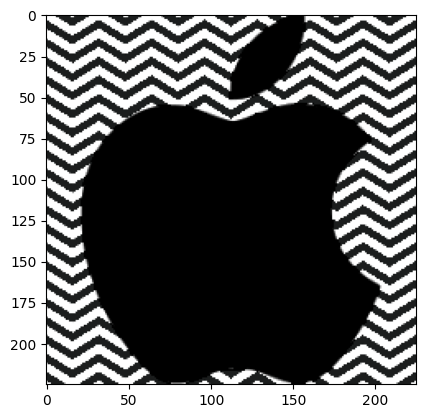

In [ ]:
# SUBTRACTION
sub_img = cv2.subtract(image1,image2)
plt.imshow(sub_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


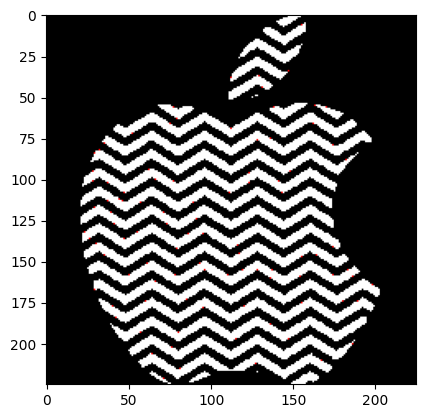

In [ ]:
# SUBTRACTION (with range normalization)
sub_img = cv2.subtract(image2,image1)
sub_img = (sub_img - np.min(sub_img))/np.max(sub_img)*255
plt.imshow(sub_img)

# ***Q.1 Create following patterns.***

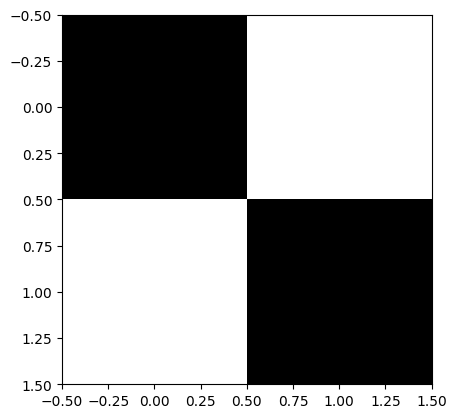

In [ ]:
pttn = np.array([[0,1],[1,0]])
plt.imshow(pttn, cmap='gray')

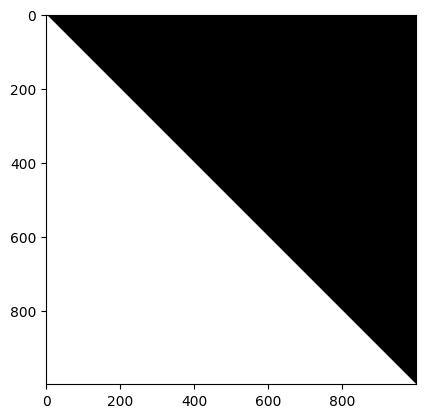

In [ ]:
tri = np.tril(np.ones((1000,1000)))
plt.imshow(tri, cmap='gray')

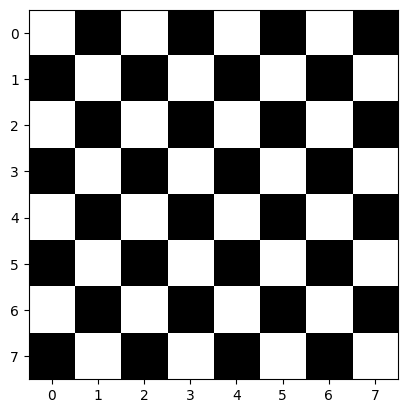

In [ ]:
chess = np.array([[1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1],
                  [1,0,1,0,1,0,1,0],
                  [0,1,0,1,0,1,0,1]])
plt.imshow(chess, cmap='gray')

# ***Q2.  Write a program to add/subtract two images of your two-digit roll number.***

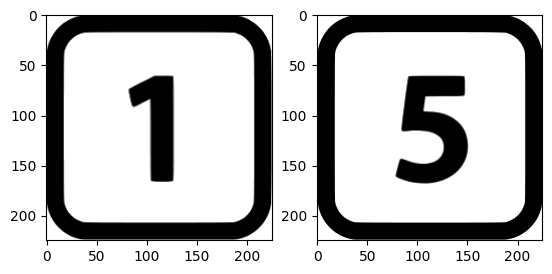

In [ ]:
img1 = abs(255-cv2.imread('1.png'))
img2 = abs(255-cv2.imread('5.png'))
f, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)

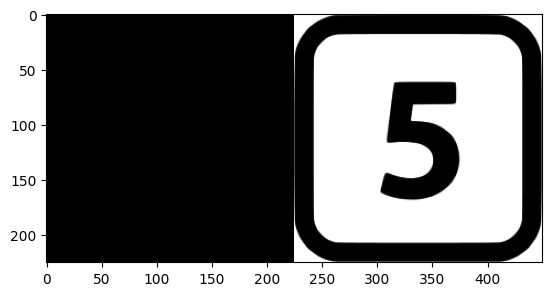

In [ ]:
# Translating 2nd digit
M = np.float32([[1, 0, img1.shape[1]], [0, 1, 0]])
img2 = cv2.warpAffine(img2, M, (2*img1.shape[1],img1.shape[0]))
plt.imshow(img2)

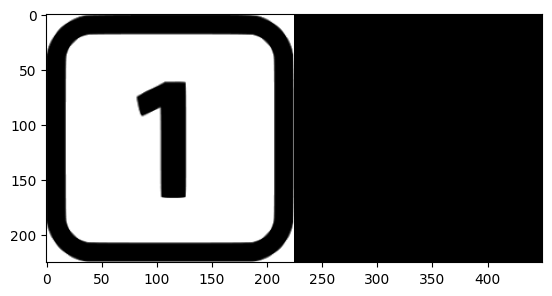

In [ ]:
# Making size of images same
pad_width = img2.shape[1] - img1.shape[1]
img1 = np.pad(img1, ((0, 0), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
plt.imshow(img1)

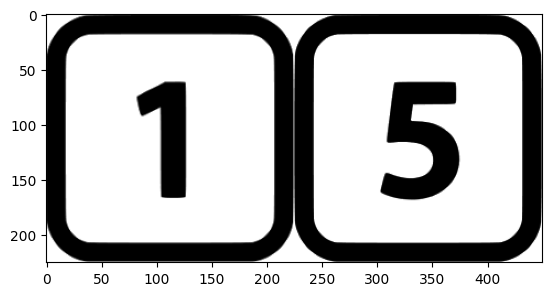

In [ ]:
# Adding the two images
rollno = cv2.add(img1,img2)
plt.imshow(rollno)

# ***Q3. Display distance patterns for D4, D8 and De.***

In [ ]:
def manhattan(pt1, pt2):
    return abs(pt1[0] - pt2[0]) + abs(pt1[1] - pt2[1])

def euclidean(pt1, pt2):
    return math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)

def chessboard(pt1, pt2):
    return max(abs(pt1[0] - pt2[0]), abs(pt1[1] - pt2[1]))

Text(0.5, 1.0, 'Manhattan Distance Pattern')

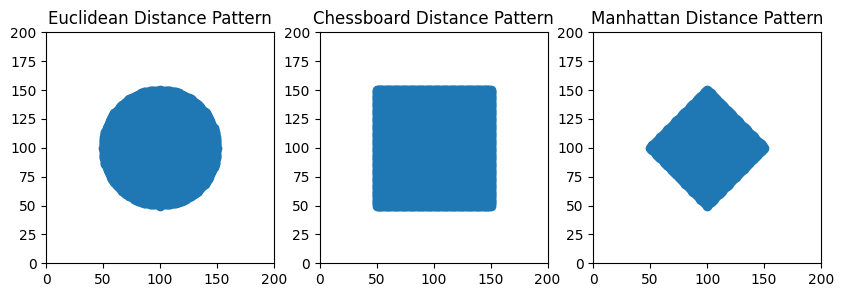

In [ ]:
f, ax = plt.subplots(1,3,figsize=(10,3))
for a in ax:
    a.set_xlim(0, 200)
    a.set_ylim(0, 200)

x,y = 100,100
D = 50
points = []

for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if euclidean((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[0].scatter([p[0] for p in points], [p[1] for p in points])
ax[0].set_title("Euclidean Distance Pattern")

points = []
for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if chessboard((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[1].scatter([p[0] for p in points], [p[1] for p in points])
ax[1].set_title("Chessboard Distance Pattern")

points = []
for i in range(-D, D + 1):
    for j in range(-D, D + 1):
        if manhattan((x, y), (x + i, y + j)) <= D:
            points.append((x + i, y + j))
ax[2].scatter([p[0] for p in points], [p[1] for p in points])
ax[2].set_title("Manhattan Distance Pattern")